# Coordinate descent for least squares

Author: Alexandre Gramfort

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

## Generate simulated data

$y = Ax+noise$

In [2]:
np.random.seed(0)
n_samples, n_features = 300, 100
A = np.random.randn(n_samples, n_features)
x = np.random.randn(n_features)
y = np.dot(A, x)
y += 0.3 * np.random.randn(n_samples)

## Option 1 : 

$\min_w \frac{1}{2} \|y - Ax\|^2$

solved with `linalg.solve`

In [3]:
x_solve = linalg.solve(np.dot(A.T, A), np.dot(A.T, y))

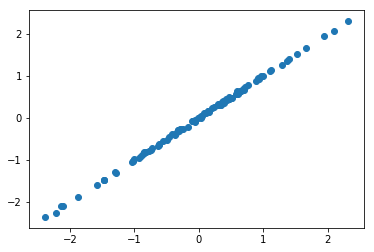

In [4]:
plt.scatter(x, x_solve);

In [7]:
gram = np.dot(A.T, A)
L = linalg.norm(gram, ord=2)

In [10]:
L, len(x)

(693.00529877576719, 100)

In [9]:
gram

array([[ 301.31095275,   -3.39958429,   15.63946099, ...,   12.31442605,
          20.45560326,   20.96458095],
       [  -3.39958429,  291.11334834,   -4.81064639, ...,    1.39023439,
          21.13858741,    8.63368263],
       [  15.63946099,   -4.81064639,  320.2441514 , ...,    6.45889953,
         -45.08130135,    9.64272795],
       ..., 
       [  12.31442605,    1.39023439,    6.45889953, ...,  265.59611562,
         -13.58298   ,   -1.58243917],
       [  20.45560326,   21.13858741,  -45.08130135, ...,  -13.58298   ,
         328.12752379,    6.41150312],
       [  20.96458095,    8.63368263,    9.64272795, ...,   -1.58243917,
           6.41150312,  278.10201985]])

## Option 2: gradient descent

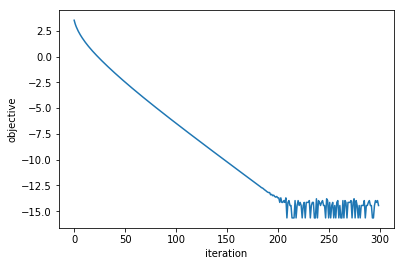

In [11]:
def gradient(x):
    return np.dot(A.T, np.dot(A, x) - y)

def objective(x):
    return 0.5 * linalg.norm(np.dot(A, x) - y) ** 2

gram = np.dot(A.T, A)
L = linalg.norm(gram, ord=2)

n_iter = 300

x_hat = np.zeros_like(x)
objs = list()
for k in range(n_iter):
    x_hat -= 1. / L * gradient(x_hat)
    objs.append(objective(x_hat))

eps = np.finfo('float').eps
plt.plot(np.log10(np.maximum(np.array(objs) - objective(x_solve), eps)))
plt.xlabel('iteration')
plt.ylabel('objective')

In [14]:
np.zeros_like([3,4,5]), eps, np.finfo?

In [ ]:
np.zeros_like([3,4,5]), eps, np.finfo

## Option 3: cyclic coordinate descent

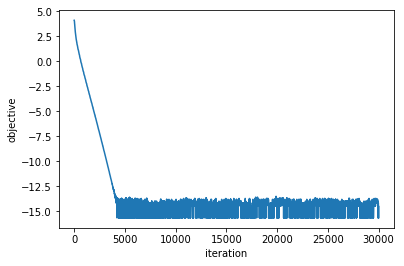

In [6]:
Li = np.sum(A * A, axis=0)

n_iter = 300 * n_features # this n_iter is the iter for coordinates 

x_hat = np.zeros_like(x) # generate the same dimension as x but with elements 0s
objs = list()
for k in range(n_iter):
    i = k % n_features
    x_hat[i] = np.dot(A[:, i].T, y - np.dot(A, x_hat) + x_hat[i] * A[:, i])
    x_hat[i] /= np.dot(A[:, i], A[:, i])
    objs.append(objective(x_hat))

plt.plot(np.log10(np.maximum(np.array(objs) - objective(x_solve), eps)))
plt.xlabel('iteration')
plt.ylabel('objective')

In [16]:
np.maximum(np.array(objs) - objective(x_solve), eps) # eps define the precision

array([  3.33226326e+03,   1.48059320e+03,   7.90334915e+02,
         4.65745229e+02,   2.91929315e+02,   1.90857843e+02,
         1.28676201e+02,   8.88316904e+01,   6.25056446e+01,
         4.46878544e+01,   3.23890261e+01,   2.37571793e+01,
         1.76106324e+01,   1.31773243e+01,   9.94278804e+00,
         7.55834435e+00,   5.78409817e+00,   4.45273676e+00,
         3.44610065e+00,   2.67977208e+00,   2.09278890e+00,
         1.64068734e+00,   1.29073751e+00,   1.01864205e+00,
         8.06223005e-01,   6.39783684e-01,   5.08936957e-01,
         4.05759041e-01,   3.24172905e-01,   2.59495177e-01,
         2.08100579e-01,   1.67171602e-01,   1.34510509e-01,
         1.08397273e-01,   8.74816162e-02,   7.07005446e-02,
         5.72150519e-02,   4.63613279e-02,   3.76129998e-02,
         3.05518031e-02,   2.48447256e-02,   2.02261407e-02,
         1.64838009e-02,   1.34478299e-02,   1.09820486e-02,
         8.97712589e-03,   7.34515869e-03,   6.01537378e-03,
         4.93071337e-03,

### or written in a more generic manner:

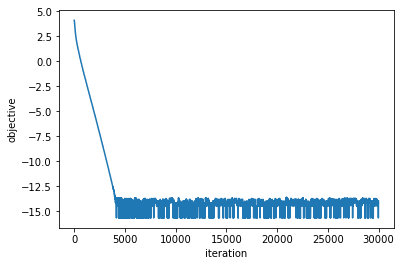

In [17]:
def gradient_i(x, i):
    return np.dot(A[:, i].T, np.dot(A, x) - y)

Li = np.sum(A * A, axis=0)

n_iter = 300 * n_features

x_hat = np.zeros_like(x)
objs = list()
for k in range(n_iter):
    i = k % n_features
    x_hat[i] -= 1. / Li[i] * gradient_i(x_hat, i) # equivalent form with the above equation
    objs.append(objective(x_hat))

plt.plot(np.log10(np.maximum(np.array(objs) - objective(x_solve), eps)))
plt.xlabel('iteration')
plt.ylabel('objective')